In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the 'Value' type
from utils import Value, MLP
from utils import PalindromeDataset, PalindromeDatasetFull

In [3]:
# Example computation
a = Value(1)
b = Value(2)
c = Value(3)
d = Value(4)

e = a*b + c*d
f = e/2.

# checking final values and initial grads (should be zero)
print(e, f, a.grad, b.grad, c.grad, d.grad, e.grad, f.grad)

# backprop
f.backward()

# checking final grads
print(e, f, a.grad, b.grad, c.grad, d.grad, e.grad, f.grad)

Value(data=14) Value(data=7.0) 0 0 0 0 0 0
Value(data=14) Value(data=7.0) 1.0 0.5 2.0 1.5 0.5 1


In [4]:
# showing the training of a simple NN, with some data
# input dim=3, output dim=1, atchitecture : NN with 4 layers : 3,4,4,1 neurons resp
from utils import MLP

# testing the MLP 
xs = [
    [2,3,-1],
    [3,-1,0.5],
    [0.5,1,1],
    [1,1,-1]
]
ys = [1,-1,-1,1] # labels
losslog = []
a = MLP(3, [4,4,1])
for step in range(200) : # 200 epochs
    # forward pass
    ypred = [a(x)[0] for x in xs]
    loss = sum((ypred-ytrue)**2 for ytrue, ypred in zip(ys, ypred)) # MSE
    losslog.append(loss.data)
    
    a.zero_grad() # taken from Module class
    loss.backward()
    
    # update 
    for w in a.parameters() :
        w.data -= 0.005 * w.grad # standard SGD for now

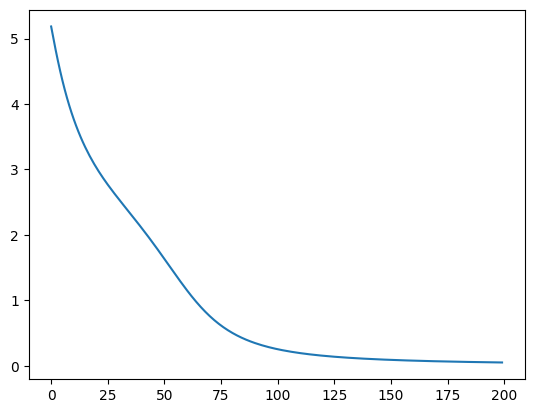

In [5]:
plt.plot(losslog)
plt.show()

In [6]:
# checking performance on the four data points
# should be close to ys=[1,-1,-1,1]
[a(x)[0] for x in xs]

[Value(data=0.8848186779010312),
 Value(data=-0.9265880370302096),
 Value(data=-0.8618042763606217),
 Value(data=0.881589215616476)]

In [7]:
datasetMaker = PalindromeDataset(10)
dataset = datasetMaker.generate_dataset(4, 6)

In [8]:
dataset

[('1011011111', 0),
 ('1000000001', 1),
 ('0101111010', 1),
 ('0010100110', 0),
 ('0011111100', 1),
 ('1001000000', 0),
 ('0010110000', 0),
 ('0110110110', 1),
 ('1111101100', 0),
 ('1011111001', 0)]

In [9]:
def convert_to_form(dataset):
    xs = []
    ys = []
    for x, y in dataset:
        xs.append([int(k) for k in list(x)])
        ys.append(y)
    return xs, ys

In [10]:
xs, ys = convert_to_form(dataset)

In [11]:
ys

[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]

In [12]:
# showing the training of a simple NN, with some data
# input dim=10, output dim=1, atchitecture : NN with 1 hidden layers : 4 with neurons
from utils import MLP

losslog = []
a = MLP(10, [4, 1])
for step in range(500) : 
    # forward pass
    ypred = [a(x)[0] for x in xs]
    loss = sum((ypred-ytrue)**2 for ytrue, ypred in zip(ys, ypred)) # MSE
    losslog.append(loss.data)
    
    a.zero_grad() # taken from Module class
    loss.backward()
    
    # update 
    for w in a.parameters() :
        w.data -= 0.005 * w.grad # standard SGD for now

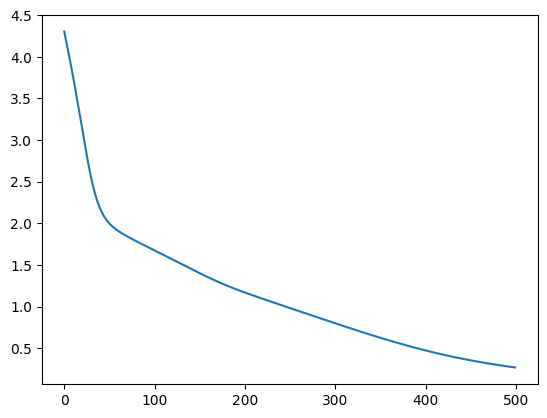

In [13]:
plt.plot(losslog)
plt.show()

In [14]:
predictions = [a(k) for k in xs]
actual_predictions = ys

In [15]:
predictions

[[Value(data=0.02374899557307913)],
 [Value(data=0.7035820155644518)],
 [Value(data=0.9217359015776778)],
 [Value(data=0.04472983353143089)],
 [Value(data=0.7506990986069049)],
 [Value(data=0.17918480637605302)],
 [Value(data=0.14549686783219978)],
 [Value(data=0.8033400405359329)],
 [Value(data=0.03581663212092822)],
 [Value(data=-0.12010017895562909)]]

In [16]:
actual_predictions

[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]

Training on Full Dataset

In [17]:
datasetMaker = PalindromeDatasetFull(10)
dataset = datasetMaker.generate_dataset()

In [18]:
len(dataset)

1024

In [19]:
dataset[:5]

[('0000000000', 1),
 ('0000000001', 0),
 ('0000000010', 0),
 ('0000000011', 0),
 ('0000000100', 0)]

  0%|          | 0/500 [00:00<?, ?it/s]

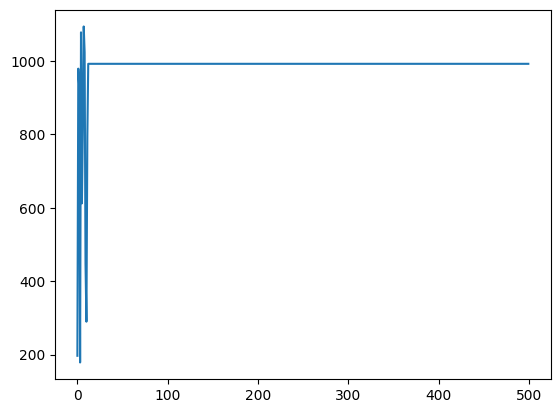

In [20]:
from tqdm.notebook import tqdm

xs, ys = convert_to_form(dataset)

losslog = []
a = MLP(10, [4, 1])
for step in tqdm(range(500)) : 
    # forward pass
    ypred = [a(x)[0] for x in xs]
    loss = sum((ypred-ytrue)**2 for ytrue, ypred in zip(ys, ypred)) # MSE
    losslog.append(loss.data)
    
    a.zero_grad() # taken from Module class
    loss.backward()
    
    # update 
    for w in a.parameters() :
        w.data -= 0.005 * w.grad # standard SGD for now

plt.plot(losslog)
plt.show()

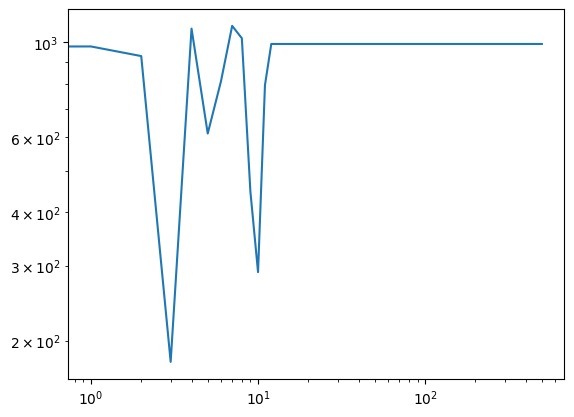

In [26]:
plt.loglog(losslog)
plt.show()

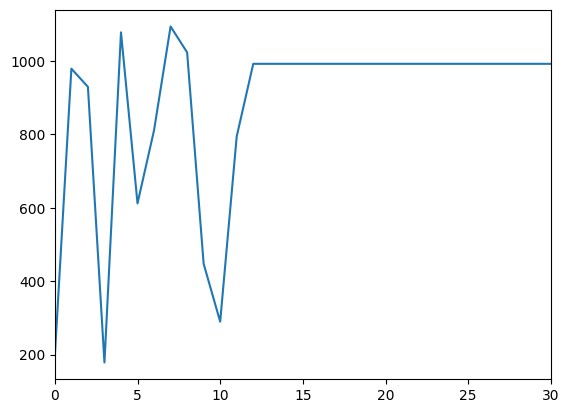

In [28]:
plt.plot(losslog)
plt.xlim(0, 30)
plt.show()

In [22]:
predictions = [a(k) for k in xs]
actual_predictions = ys

In [23]:
predictions[:5]

[[Value(data=0.9999990340069594)],
 [Value(data=0.9999983561368575)],
 [Value(data=0.9999999860804323)],
 [Value(data=0.9999997925966568)],
 [Value(data=0.9999768680848169)]]

In [24]:
ys[:5]

[1, 0, 0, 0, 0]